<a href="https://colab.research.google.com/github/Bertoncini/AluraQuarentenaDados/blob/master/02_Desafio_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio 3

Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [0]:
import pandas as pd
filmes = pd.read_csv('https://raw.githubusercontent.com/Bertoncini/AluraQuarentenaDados/master/DataSet/MovieLens/movies.csv')
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/Bertoncini/AluraQuarentenaDados/master/DataSet/MovieLens/ratings.csv')

In [0]:
filmes.columns = ['filmeId','titulo','generos']
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']

In [0]:
avaliacoes_media_filme = avaliacoes.groupby('filmeId')['nota'].mean().round(2)

In [0]:
filmes_media = filmes.join(avaliacoes_media_filme,"filmeId").rename(columns={'nota':'notaMedia'})

In [0]:
total_avaliacao_filme = avaliacoes.groupby('filmeId')['nota'].count()

In [0]:
filmes_media_total = filmes_media.join(total_avaliacao_filme,'filmeId').rename(columns={'nota':'qtdNota'})

In [0]:
generos = filmes_media_total['generos'].str.get_dummies('|').sum().sort_values(ascending=False)

In [0]:
filme_mais_votado_ids = filmes_media_total.sort_values('qtdNota',ascending=False).head(10)['filmeId'].to_list()
filme_mais_votado_titulos = filmes_media_total.sort_values('qtdNota',ascending=False).head(10)['titulo'].to_list()

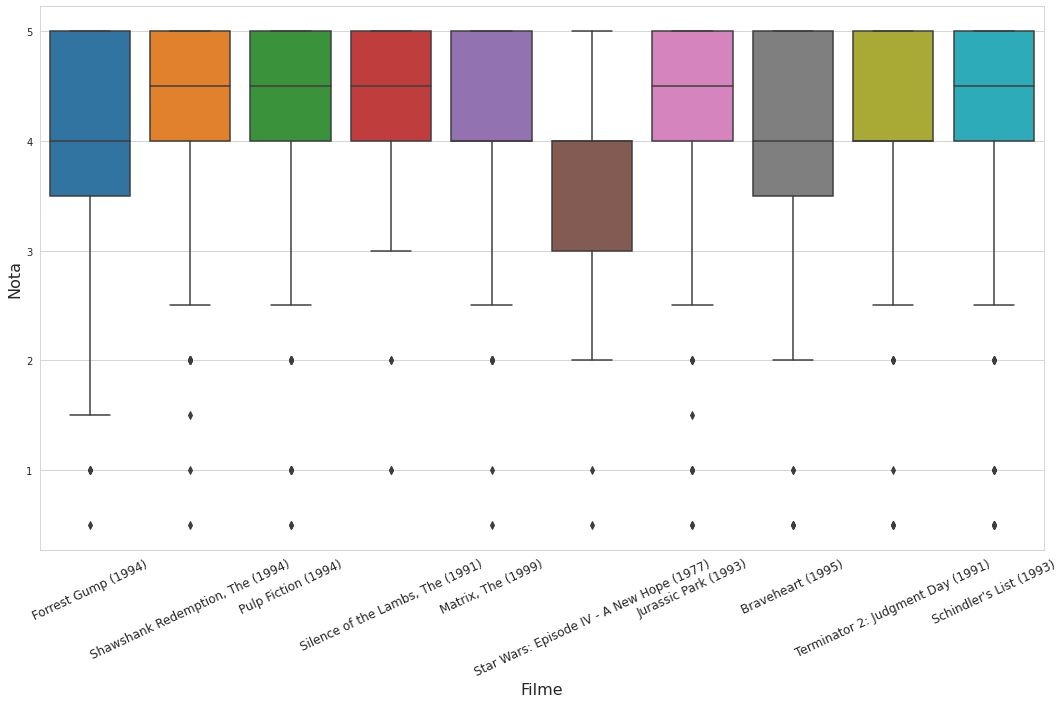

In [127]:
plt.figure(figsize=(18, 10))

boxplot = sns.boxplot(data = avaliacoes.query(f"filmeId in {filme_mais_votado_ids}"), x ="filmeId", y="nota")
boxplot.set_xticklabels(filme_mais_votado_titulos, fontsize=12)
boxplot.set_xlabel("Filme", fontsize=16)
boxplot.set_ylabel("Nota", fontsize=16)

plt.xticks(rotation=45)

plt.show()